# Vamos aplicar o que aprendemos sobre Kmeans

Corra a primeira célula de código para obter o dataframe com que vamos trabalhar

In [4]:
# faça o upload do ficheiro csv associado à atividade

# vamos importar a biblioteca
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# vamos importar o dataset das iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
# veja as 5 primeiras linhas do dataframe
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:

# veja a forma do dataframe: quantas linhas, quantas colunas?
X.shape
# veja a informação sobre o dataframe
X.info()
# veja a descrição das variáveis numéricas
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# aplique o modelo de KMeans com 6 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

In [13]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

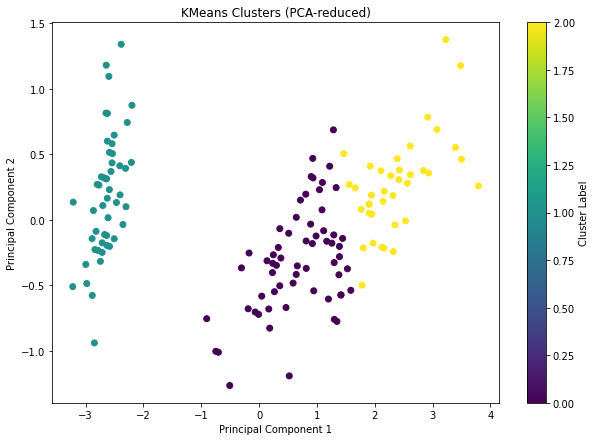

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.title('KMeans Clusters (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

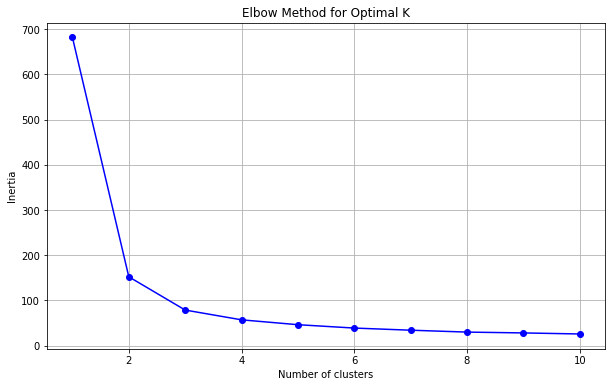

In [6]:
# verifique o melhor K com o elbow method
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# faça plot do elbow method
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

Silhouette Score for K=3: 0.5528190123564095


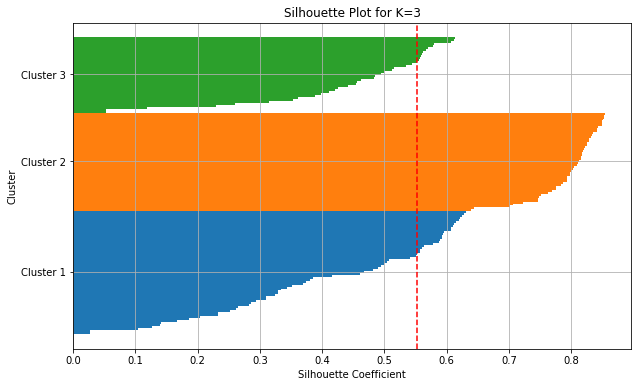

In [7]:
# Escolha o número óptimo de clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

# avalie o silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score for K={optimal_k}: {silhouette_avg}')

# faça plot dos resultados
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X, y_kmeans)

plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
yticks = []

for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, [f'Cluster {i+1}' for i in range(optimal_k)])
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title(f'Silhouette Plot for K={optimal_k}')
plt.grid(True)
plt.show()